In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

iris_klastering = pd.read_csv('D:\\\\BelajarML\\\\dataset\\\\iris.csv', on_bad_lines='skip')
x = iris_klastering.iloc[:, [4]].values
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [245]:
x

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [246]:
iris_klastering.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [247]:
iris_klastering[iris_klastering.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [248]:
iris_klastering = iris_klastering.drop_duplicates()
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [249]:
print(iris_klastering.columns)
iris_klastering

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [250]:
iris_klastering = iris_klastering.drop(columns=['Species'])

In [251]:
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [252]:
iris_klastering.isnull().sum()

SepalLength    0
SepalWidth     2
PetalLength    2
PetalWidth     0
dtype: int64

In [253]:
iris_klastering.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [254]:
iris_klastering.describe()

,SepalWidth,PetalLength,PetalWidth
count,145.000000,145.000000,147.000000
mean,3.055862,3.788276,1.208844
std,0.439993,1.757188,0.757874
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.400000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


# Membersihkan data yang NaN

In [278]:
iris_klastering['SepalLength'] = pd.to_numeric(iris_klastering['SepalLength'], errors='coerce')
iris_klastering = iris_klastering.dropna()
clean_iris_df = iris_klastering
clean_iris_df[clean_iris_df.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Features Scaling with Min Max Scaler 

In [284]:
mms = MinMaxScaler()
clean_iris_df = mms.fit_transform(clean_iris_df)
clean_iris_df = pd.DataFrame(clean_iris_df, columns=iris_klastering.columns)
clean_iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
137,0.666667,0.416667,0.711864,0.916667
138,0.555556,0.208333,0.677966,0.750000
139,0.611111,0.416667,0.711864,0.791667
140,0.527778,0.583333,0.745763,0.916667


# Menentukan Nilai K dengan Elbow Method

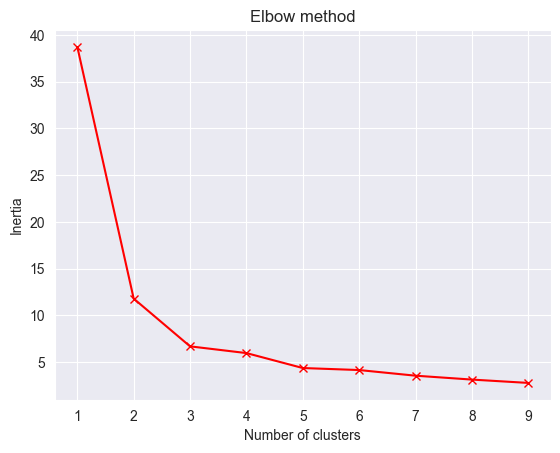

In [285]:
inertia = []
silhouette_avg = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(clean_iris_df)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.title('Elbow method')
plt.plot(range(1, 10), inertia, marker='x', c="red")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Menentukan Nilai K dengan Silhouette Method

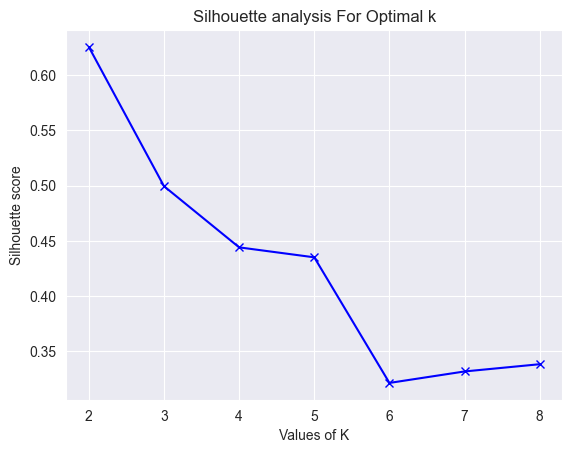

In [286]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    #initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(clean_iris_df)
    cluster_labels = kmeans.labels_
    #silhouette score
    silhouette_avg.append(silhouette_score(clean_iris_df, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [287]:
inertia

[38.70850378857273,
 11.804938179969467,
 6.700521401628483,
 5.981906606677931,
 4.383967173741094,
 4.1678175859522355,
 3.5649981942383033,
 3.149053544551025,
 2.791832687774523]

In [288]:
print(kmeans.cluster_centers_)

[[0.16666667 0.125      0.31864407 0.325     ]
 [0.88194444 0.46875    0.89830508 0.8125    ]
 [0.15833333 0.54166667 0.07457627 0.05694444]
 [0.38555556 0.265      0.52677966 0.48      ]
 [0.5941358  0.42824074 0.60640301 0.56481481]
 [0.62426901 0.46491228 0.76271186 0.89692982]
 [0.29960317 0.7827381  0.08595642 0.07440476]
 [0.51315789 0.32894737 0.70205174 0.69736842]]


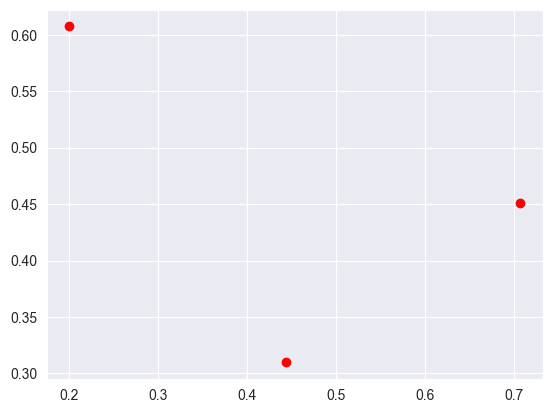

In [289]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(clean_iris_df)
y_kmeans = kmeans.fit_predict(clean_iris_df)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red")
plt.show()

# Feature Labels

In [290]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0 2 2 0]


# Menentukan titik centroid pada kmeans

In [291]:
print("List of Centroids")
kmeans.cluster_centers_

List of Centroids


array([[0.44348659, 0.30962644, 0.57159556, 0.54454023],
       [0.2       , 0.60740741, 0.07758945, 0.06296296],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

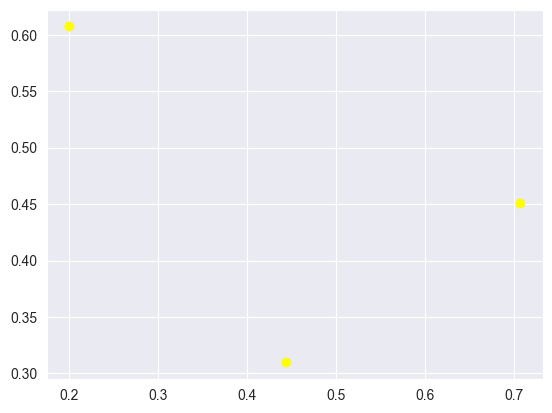

In [292]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="yellow", label="Centroids")

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Width , Petal Length]

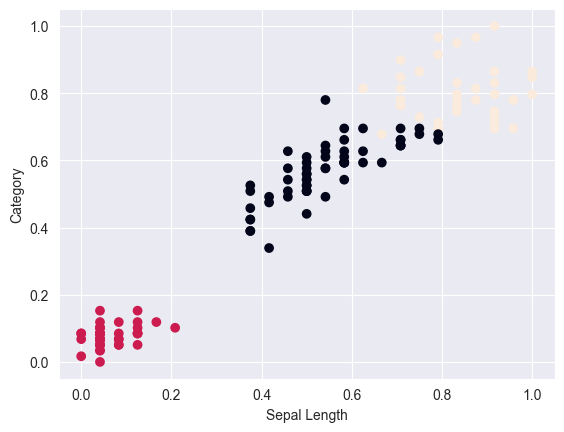

In [294]:
plt.scatter(clean_iris_df['PetalWidth'], clean_iris_df['PetalLength'], c=kmeans.labels_)
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()

In [295]:
print("Centroid untuk setiap Features")
print(clean_iris_df.columns)
kmeans.cluster_centers_

Centroid untuk setiap Features
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')


array([[0.44348659, 0.30962644, 0.57159556, 0.54454023],
       [0.2       , 0.60740741, 0.07758945, 0.06296296],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

# Korelasi setiap label

In [296]:
clean_iris_df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.112386,0.871020,0.814127
SepalWidth,-0.112386,1.000000,-0.427052,-0.364079
PetalLength,0.871020,-0.427052,1.000000,0.960888
PetalWidth,0.814127,-0.364079,0.960888,1.000000


<Axes: >

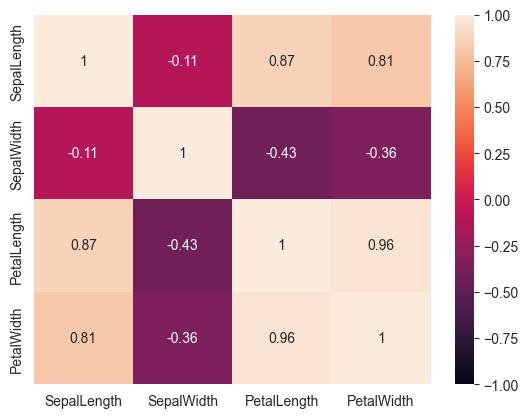

In [297]:
sns.heatmap(clean_iris_df.corr(), vmin=-1, vmax=1, annot=True)

# Mengambil semua baris matriks , dan ambil kolom ke 3 dan 2 untuk Petal Width dan Sepal Length

In [298]:
centroids_petalW = kmeans.cluster_centers_[:, 2]
centroids_sepalL = kmeans.cluster_centers_[:, 0]

# Visualisasikan hasil klastering ke dalam Scatter Plot dan Hist Plot [Petal Width , Sepal Length]

<Axes: xlabel='PetalWidth', ylabel='SepalLength'>

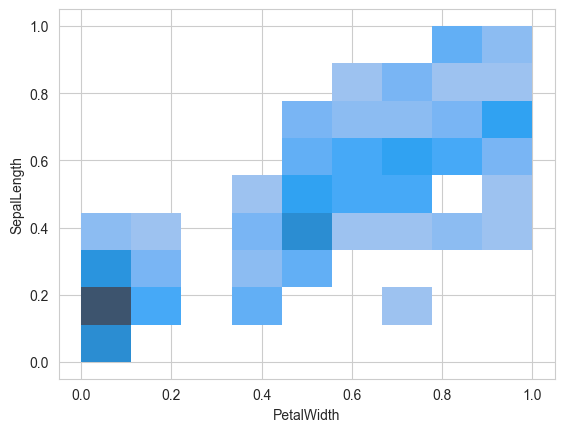

In [299]:
sns.set_style("whitegrid")
sns.histplot(x=clean_iris_df['PetalWidth'], y=clean_iris_df['SepalLength'])

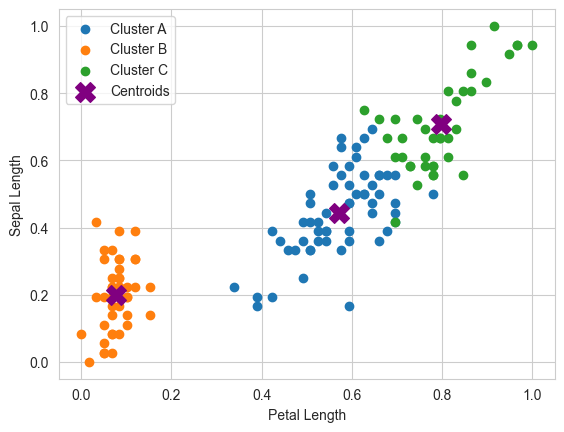

In [300]:
labels = {0: "A", 1: "B", 2: "C"}
for label, cluster_label in labels.items():
    plt.scatter(clean_iris_df['PetalLength'][kmeans.labels_ == label],
                clean_iris_df['SepalLength'][kmeans.labels_ == label],
                label=f'Cluster {cluster_label}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids_petalW, centroids_sepalL, marker='X', s=200, color='purple', label='Centroids')
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()
plt.show()

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Width , Sepal Length]

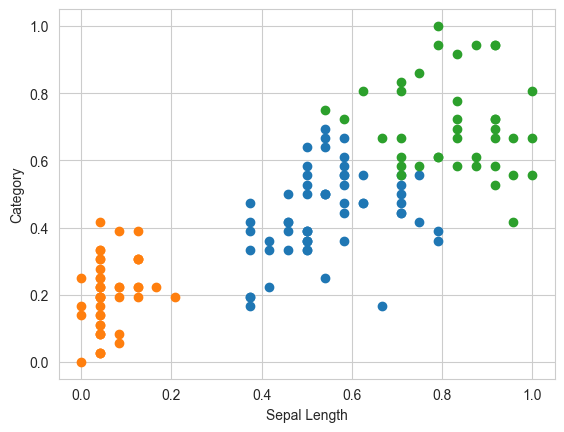

In [301]:

for label, cluster_label in labels.items():
    plt.scatter(clean_iris_df['PetalWidth'][kmeans.labels_ == label],
                clean_iris_df['SepalLength'][kmeans.labels_ == label],
                label=f'Cluster {cluster_label}')

plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()